## Finger Print Detection
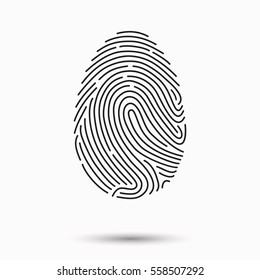

### Importing all the Necessary libraries..

In [2]:
from keras.applications.resnet50 import ResNet50,preprocess_input

In [3]:
from keras.preprocessing import image
import numpy as np

In [4]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from glob import glob
import matplotlib.pyplot as plt

### ResNet 50 Model Description

In [5]:
#vgg16_model=VGG16()
resnet_model=ResNet50()

102973440/102967424 [==============================] - 2s 0us/step


In [6]:
#vgg16_model.summary()
resnet_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [7]:
type(resnet_model)

tensorflow.python.keras.engine.functional.Functional

In [8]:
IMAGE_SIZE = [224, 224]
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 1s 0us/step


In [9]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [10]:
for layer in resnet.layers:
    layer.trainable = False

In [11]:
x = Flatten()(resnet.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(4, activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [12]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [13]:
from google.colab import files
uploaded = files.upload()

Saving Data.zip to Data.zip


In [14]:
!unzip 'Data.zip'

Archive:  Data.zip
   creating: Data/
   creating: Data/Test/
   creating: Data/Test/Harshita/
  inflating: Data/Test/Harshita/enhanced_image_h1.jpg  
  inflating: Data/Test/Harshita/enhanced_image_h2.jpg  
  inflating: Data/Test/Harshita/enhanced_image_h3.jpg  
  inflating: Data/Test/Harshita/enhanced_image_h4.jpg  
   creating: Data/Test/Neetish/
  inflating: Data/Test/Neetish/enhanced_image_n1.jpg  
  inflating: Data/Test/Neetish/enhanced_image_n2.jpg  
  inflating: Data/Test/Neetish/enhanced_image_n3.jpg  
  inflating: Data/Test/Neetish/enhanced_image_n4.jpg  
   creating: Data/Test/Shivangi/
  inflating: Data/Test/Shivangi/enhanced_image_s1.jpg  
  inflating: Data/Test/Shivangi/enhanced_image_s3.jpg  
  inflating: Data/Test/Shivangi/enhanced_image_s4.jpg  
  inflating: Data/Test/Shivangi/_s2.jpg  
   creating: Data/Test/Vicky/
  inflating: Data/Test/Vicky/enhanced_image_v1.jpg  
  inflating: Data/Test/Vicky/enhanced_image_v2.jpg  
  inflating: Data/Test/Vicky/enhanced_image_v3.jpg

In [15]:
# useful for getting number of classes
folders = glob('Data/Train/*')
print(len(folders))

4


In [16]:
train='Data/Train'
test='Data/Test'
#valid='Data/Valid'

In [17]:
len(train)

10

In [19]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [21]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [22]:
# Data Augmentation
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [23]:
from keras.preprocessing.image import ImageDataGenerator
train_set=train_datagen.flow_from_directory(train,target_size=(224,224),class_mode='categorical',
                                                      batch_size=32)
test_set=test_datagen.flow_from_directory(test,target_size=(224,224),class_mode='categorical',   
                                                      batch_size=32)
#valid_set=valid_datagen.flow_from_directory(valid,target_size=(224,224),class_mode='categorical',
 #                                           batch_size=4,shuffle=True)

Found 16 images belonging to 4 classes.
Found 16 images belonging to 4 classes.


In [24]:
from keras import optimizers
#sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9)
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [25]:
train_set.class_indices

{'Harshita': 0, 'Neetish': 1, 'Shivangi': 2, 'Vicky': 3}

In [88]:
r = model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(train_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 4.0513 - accuracy: 0.7500 - val_loss: 3.6724 - val_accuracy: 0.6875
Epoch 2/50
1/1 [==============================] - 4s 4s/step - loss: 1.7479 - accuracy: 0.8750 - val_loss: 1.8412 - val_accuracy: 0.8750
Epoch 3/50
1/1 [==============================] - 4s 4s/step - loss: 6.7051e-05 - accuracy: 1.0000 - val_loss: 1.9978 - val_accuracy: 0.8750
Epoch 4/50
1/1 [==============================] - 4s 4s/step - loss: 1.6594 - accuracy: 0.6875 - val_loss: 3.4520 - val_accuracy: 0.7500
Epoch 5/50
1/1 [==============================] - 4s 4s/step - loss: 10.3029 - accuracy: 0.6875 - val_loss: 5.2525 - val_accuracy: 0.7500
Epoch 6/50
1/1 [==============================] - 4s 4s/step - loss: 2.9699 - accuracy: 0.8750 - val_loss: 8.2700 - val_accuracy: 0.8125
Epoch 7/50
1/1 [==============================] - 4s 4s/step - loss: 2.8638 - accuracy: 0.8125 - val_loss: 2.2080 - val_accuracy: 0.9375
Epoch 8/50
1/1 [====================

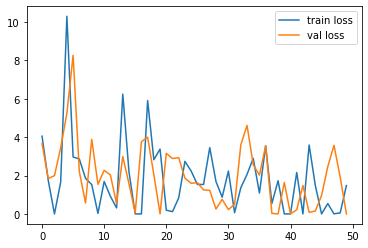

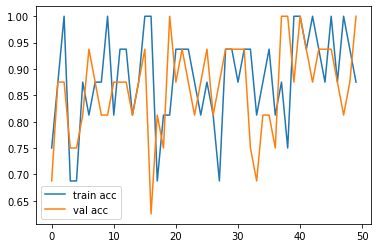

<Figure size 432x288 with 0 Axes>

In [89]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [90]:
pred=model.predict_generator(test_set)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [91]:
test_set.class_indices

{'Harshita': 0, 'Neetish': 1, 'Shivangi': 2, 'Vicky': 3}

In [92]:
print(pred)

[[2.4217123e-32 1.5245708e-34 1.0000000e+00 2.2523865e-35]
 [7.3031208e-20 1.1261707e-17 1.0000000e+00 6.0748074e-29]
 [0.0000000e+00 1.4550070e-09 0.0000000e+00 1.0000000e+00]
 [5.8998411e-30 1.0000000e+00 0.0000000e+00 5.5954692e-17]
 [1.5367704e-24 1.0000000e+00 0.0000000e+00 1.0182983e-27]
 [1.0000000e+00 2.1177210e-36 0.0000000e+00 1.8139014e-34]
 [9.9981397e-01 1.8609675e-04 0.0000000e+00 9.5173996e-22]
 [1.0000000e+00 7.9000495e-09 4.5382618e-20 0.0000000e+00]
 [1.0000000e+00 1.2453020e-33 1.1100626e-37 7.7381835e-35]
 [3.5197050e-15 1.0000000e+00 0.0000000e+00 4.9802907e-22]
 [3.2982182e-30 7.5232574e-35 1.0000000e+00 1.5301059e-34]
 [7.6373241e-14 5.3763194e-36 1.0000000e+00 3.1995009e-37]
 [1.0000000e+00 0.0000000e+00 8.8927286e-23 3.3867238e-32]
 [3.4707741e-14 9.3641496e-08 5.8073539e-37 9.9999988e-01]
 [5.3353093e-23 1.6100833e-19 1.3651398e-37 1.0000000e+00]
 [2.4615417e-35 9.5665939e-07 0.0000000e+00 9.9999905e-01]]


In [93]:
predicted_class_indices=np.argmax(pred,axis=1)

In [94]:
predicted_class_indices

array([2, 2, 3, 1, 1, 0, 0, 0, 0, 1, 2, 2, 0, 3, 3, 3])

In [95]:
labels = (train_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [96]:
print(labels)

{0: 'Harshita', 1: 'Neetish', 2: 'Shivangi', 3: 'Vicky'}


In [97]:
print(test_set.filenames)

['Harshita/enhanced_image_h1.jpg', 'Harshita/enhanced_image_h2.jpg', 'Harshita/enhanced_image_h3.jpg', 'Harshita/enhanced_image_h4.jpg', 'Neetish/enhanced_image_n1.jpg', 'Neetish/enhanced_image_n2.jpg', 'Neetish/enhanced_image_n3.jpg', 'Neetish/enhanced_image_n4.jpg', 'Shivangi/_s2.jpg', 'Shivangi/enhanced_image_s1.jpg', 'Shivangi/enhanced_image_s3.jpg', 'Shivangi/enhanced_image_s4.jpg', 'Vicky/enhanced_image_v1.jpg', 'Vicky/enhanced_image_v2.jpg', 'Vicky/enhanced_image_v3.jpg', 'Vicky/enhanced_image_v4.jpg']


In [98]:
predictions

['Shivangi',
 'Shivangi',
 'Vicky',
 'Neetish',
 'Neetish',
 'Harshita',
 'Harshita',
 'Harshita',
 'Harshita',
 'Neetish',
 'Shivangi',
 'Shivangi',
 'Harshita',
 'Vicky',
 'Vicky',
 'Vicky']

## **Trained Model**

In [99]:
from tensorflow.keras.models import load_model
model.save('model_resnet50.h5')

In [100]:
from tensorflow.keras.preprocessing import image
mymodel=load_model('model_resnet50.h5')


In [101]:
import cv2
import matplotlib.pyplot as plt


**OUTPUT**

Vicky


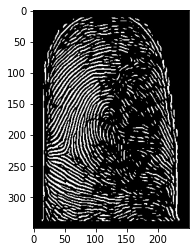

In [106]:
IMG_PATH="Data/Test/Vicky/enhanced_image_v1.jpg"
myimage=cv2.imread(IMG_PATH)
plt.imshow(myimage)
img=image.load_img(IMG_PATH,target_size=(224,224))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
mymodel.predict(img_data)
#see index 1 having highest probability 99.96%
a=np.argmax(mymodel.predict(img_data),axis=1)
if(a==0):
  print("Harshita")
if(a==1):
  print("Neetish")
if(a==2):
  print("Shivangi")
if(a==3):
  print("Vicky")
